In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
#from lr_utils import load_dataset

In [2]:
def load_dataset():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    print("hi5")
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [3]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

hi5


y = [1] , es ==cat==imagen


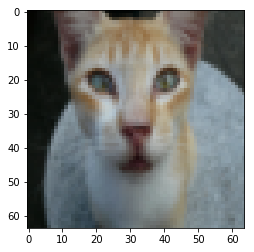

In [4]:
index = 11
plt.imshow(train_set_x_orig[index])
print("y = "+str(train_set_y[:, index])+ " , es =="+classes[np.squeeze(train_set_y[:, index])].decode("utf-8")+ "==imagen")

In [5]:
import time
### El conjunto de entrada es:
print("Número de ejemplos de entrenamiento:", train_set_x_orig.shape[0])
### El conjunto de validacion es:
print("Número de ejemplos de validación:", train_set_y.shape[1])

### El conjunto de prueba es: 
print("Número de ejemplos de prueba entrada:", test_set_x_orig.shape[0])
print("Número de ejemplos de prueba salida:", test_set_y.shape[1])

### Cada vector imagen es de dimensión 64x64 .
print("Tamaño de cada imagen:", train_set_x_orig.shape[1])


Número de ejemplos de entrenamiento: 209
Número de ejemplos de validación: 209
Número de ejemplos de prueba entrada: 50
Número de ejemplos de prueba salida: 50
Tamaño de cada imagen: 64


In [6]:
### Remodelando datos de entrenamiento y prueba, para que se aplanen en vectores

train_set_x_orig_flatten = train_set_x_orig.reshape (train_set_x_orig.shape [0], -1) .T # X.T es la transposición de X
print (train_set_x_orig_flatten)

print ("-------------")

test_set_x_orig_flatten = test_set_x_orig.reshape (test_set_x_orig.shape [0], -1) .T # X.T es la transposición de X
print (test_set_x_orig_flatten)

[[ 17 196  82 ... 143  22   8]
 [ 31 192  71 ... 155  24  28]
 [ 56 190  68 ... 165  23  53]
 ...
 [  0  82 138 ...  85   4   0]
 [  0  80 141 ... 107   5   0]
 [  0  81 142 ... 149   0   0]]
-------------
[[158 115 255 ...  41  18 133]
 [104 110 253 ...  47  18 163]
 [ 83 111 254 ...  84  16  75]
 ...
 [173 171 133 ... 183 144   5]
 [128 176 101 ... 141 137  22]
 [110 186 121 ... 116 108   5]]


In [13]:
### Funcion sigmoide
### import numpy as np
def sigmoide(self):
  return 1 / (1 + np.exp(-self))

In [17]:
valor = np.random.random(50)
print (sigmoide(valor))

[0.5629767  0.64417852 0.71818675 0.57260822 0.56023116 0.54376722
 0.53535678 0.69625717 0.6287452  0.62340209 0.66974165 0.69887796
 0.51416524 0.68930061 0.72211683 0.62314488 0.5282958  0.72991511
 0.59106642 0.70473663 0.52002458 0.53617057 0.54674414 0.54382221
 0.72831755 0.58969478 0.55530676 0.58267414 0.68111476 0.69906573
 0.60899175 0.67435978 0.56626687 0.51363081 0.5195655  0.52565915
 0.69388517 0.5357103  0.69461171 0.59514275 0.70023848 0.71938911
 0.51900284 0.67269515 0.54103084 0.53397245 0.50751676 0.66500681
 0.72381917 0.60168523]


In [9]:
### Estandarizando conjunto de datos
train_set_x_orig = train_set_x_orig_flatten/255
test_set_x_orig = test_set_x_orig_flatten/255
print(train_set_x_orig)

[[0.06666667 0.76862745 0.32156863 ... 0.56078431 0.08627451 0.03137255]
 [0.12156863 0.75294118 0.27843137 ... 0.60784314 0.09411765 0.10980392]
 [0.21960784 0.74509804 0.26666667 ... 0.64705882 0.09019608 0.20784314]
 ...
 [0.         0.32156863 0.54117647 ... 0.33333333 0.01568627 0.        ]
 [0.         0.31372549 0.55294118 ... 0.41960784 0.01960784 0.        ]
 [0.         0.31764706 0.55686275 ... 0.58431373 0.         0.        ]]
